In [205]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib

In [206]:
np.random.seed(42)

# load dataset

In [207]:
data = pd.read_csv('/Users/hirunifernando/Desktop/tree_classifier__datasets.csv')

# separate features and labels

In [208]:
X = data[['length', 'width', 'ratio', 'petiole_length', 'angle']]

In [209]:
y = data['species']

# Split the dataset into training and testing sets

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [211]:
x_val = X_train[:30]
y_val = y_train[:30]

In [212]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [213]:
one_hot_train_labels = to_categorical(y_train)
one_hot_val_labels = to_categorical(y_val)
one_hot_test_labels = to_categorical(y_test)

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
X_train.shape

(120, 5)

In [216]:
X_test.shape

(30, 5)

In [217]:
len(one_hot_train_labels)

120

In [218]:
one_hot_test_labels.shape

(30, 3)

In [219]:
one_hot_train_labels.shape



(120, 3)

In [220]:
one_hot_val_labels.shape

(30, 3)

# Define the model

In [270]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [271]:
import tensorflow as tf

In [272]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

In [273]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model

In [274]:
history = model.fit(X_train,one_hot_train_labels, epochs=5, batch_size=10, validation_data=(x_val, one_hot_val_labels))

Epoch 1/5
12/12 [==============================] - 0s 6ms/step - loss: 0.8518 - accuracy: 0.6000 - val_loss: 14.6515 - val_accuracy: 0.2667
Epoch 2/5
12/12 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.8583 - val_loss: 18.9542 - val_accuracy: 0.2667
Epoch 3/5
12/12 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.9750 - val_loss: 19.5104 - val_accuracy: 0.2667
Epoch 4/5
12/12 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9917 - val_loss: 18.4681 - val_accuracy: 0.2667
Epoch 5/5
12/12 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9917 - val_loss: 16.0883 - val_accuracy: 0.2667


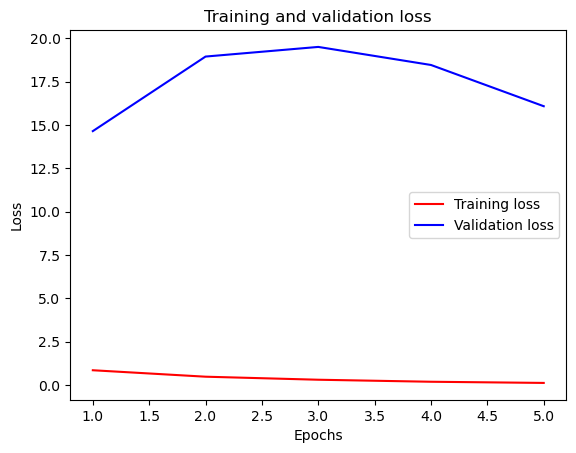

In [275]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

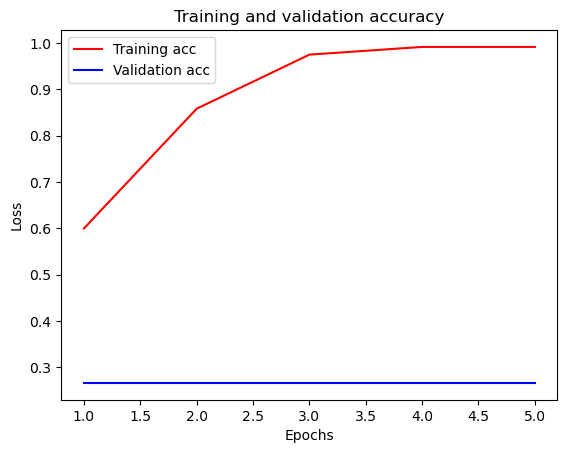

In [276]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# evaluate the model

In [277]:
loss, accuracy = model.evaluate(X_test,one_hot_test_labels )
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 52ms/step - loss: 0.0747 - accuracy: 1.0000
Test Accuracy: 100.00%


X_scaled = scaler.transform(X)

# make predictions

In [278]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [279]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(one_hot_test_labels, axis=1)

In [280]:
predicted_species = label_encoder.inverse_transform(predicted_classes)
true_species = label_encoder.inverse_transform(true_classes)

In [281]:
results = pd.DataFrame({'True Species': true_species, 'Predicted Species': predicted_species})
print(results)

         True Species  Predicted Species
0               guava              guava
1               guava              guava
2           jackfruit          jackfruit
3               guava              guava
4               guava              guava
5   creamColour_ixora  creamColour_ixora
6           jackfruit          jackfruit
7           jackfruit          jackfruit
8               guava              guava
9               guava              guava
10  creamColour_ixora  creamColour_ixora
11              guava              guava
12          jackfruit          jackfruit
13  creamColour_ixora  creamColour_ixora
14              guava              guava
15  creamColour_ixora  creamColour_ixora
16          jackfruit          jackfruit
17              guava              guava
18  creamColour_ixora  creamColour_ixora
19  creamColour_ixora  creamColour_ixora
20          jackfruit          jackfruit
21              guava              guava
22          jackfruit          jackfruit
23              

In [282]:
accuracy = np.mean(predicted_species == true_species)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

Prediction Accuracy: 100.00%


In [283]:
model.save('tree_species_classifier2.h5')